# EDA: Análise de Dados Exploratória e Data Preprocessing

In [191]:
# Importações de libraries importantes
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [192]:
# Leitura dos datasets
train_df = pd.read_csv("../data/raw/train_dataset.csv")
test_df = pd.read_csv("../data/raw/test_dataset.csv")

In [193]:
train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [194]:
# Formato do dataframe (amostras, features)
train_df.shape

(38984, 23)

In [195]:
train_df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


## Funções auxiliadoras

In [200]:
def plot_dist(df, feature):
    
    '''
    Cria os gráficos de distribuição dos valores das features.
    
    Parâmetros:
    df - Pandas DataFrame
    feature - Nome de coluna do DataFrame
    
    Return:
    Seaborn graph com valor de skewness
    
    '''
    feature_skew = df[feature].skew()
    sbn.histplot(data=df, x=df[feature], kde=True)
    plt.legend(labels=[f"Skewness: {round(feature_skew, 3)}"])
    plt.show()
    
def plot_corr(df):
    
    '''
    Cria o gráfico heatmap da matriz de correlação entre as features.
    
    Parâmetros:
    df - Pandas DataFrame
    
    Return:
    Seaborn graph
    
    '''
    corr_matrix = df.corr()
    sbn.heatmap(corr_matrix)
    plt.show()
    
def rename_cols(df, columns_newname={"Urine protein": "urine_protein", 
                                     "hearing(left)": "hearing_left", 
                                     "hearing(right)": "hearing_right"}):
    
    '''
    Renormeia colunas de um dataframe
    
    Parâmetros:
    df - Pandas DataFrame
    columns_newname - dict
    
    Return:
    df - Pandas DataFrame
    
    '''
    
    df = df.rename(columns=columns_newname)
    return df

def get_dummies(df, features=['hearing_left', 'hearing_right', 'urine_protein']):
    
    '''
    Transforma as variáveis categóricas em dummy variables.
    
    Parâmetros:
    df - Pandas DataFrame
    features - list
    
    Return:
    df - Pandas DataFrame
    
    '''
    df = pd.get_dummies(df, columns=features)
    return df
    

## Preparação dos dados

In [202]:
train_df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [203]:
# Renomeação das features
train_df = rename_cols(train_df)
test_df = rename_cols(test_df)

In [204]:
# Criação das dummies de features categóricas
train_df = get_dummies(train_df)
test_df = get_dummies(test_df)

In [209]:
test_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,hearing_left_1,hearing_left_2,hearing_right_1,hearing_right_2,urine_protein_1,urine_protein_2,urine_protein_3,urine_protein_4,urine_protein_5,urine_protein_6
0,40,170,65,75.1,1.0,0.9,120,70,102,225,...,1,0,1,0,1,0,0,0,0,0
1,45,170,75,89.0,0.7,1.2,100,67,96,258,...,1,0,1,0,1,0,0,0,0,0
2,30,180,90,94.0,1.0,0.8,115,72,88,177,...,1,0,1,0,1,0,0,0,0,0
3,60,170,50,73.0,0.5,0.7,118,78,86,187,...,1,0,1,0,1,0,0,0,0,0
4,30,170,65,78.0,1.5,1.0,110,70,87,190,...,1,0,1,0,1,0,0,0,0,0


## Plotagem de gráficos

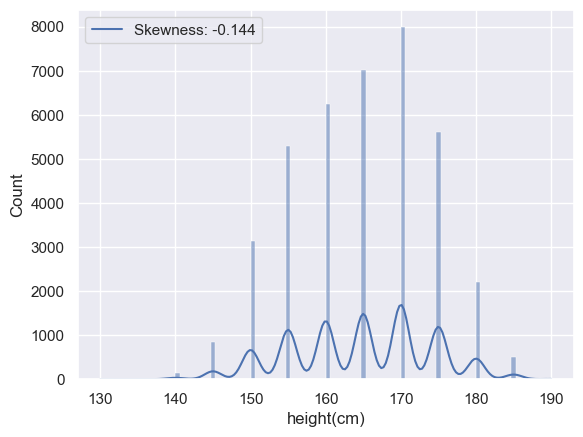

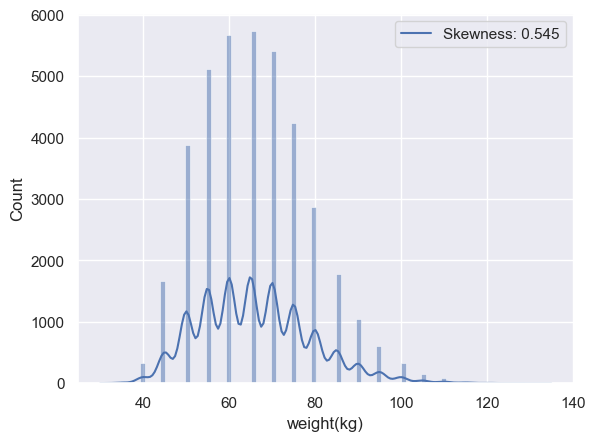

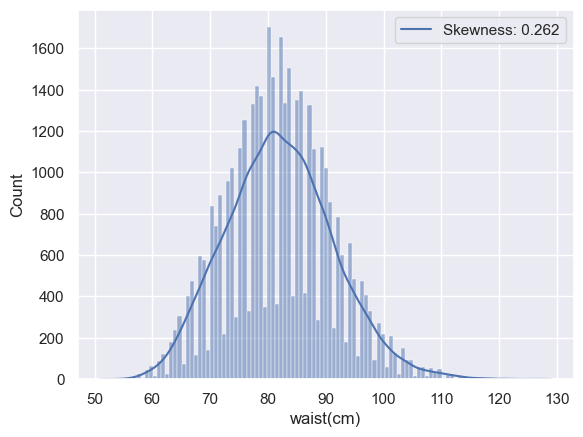

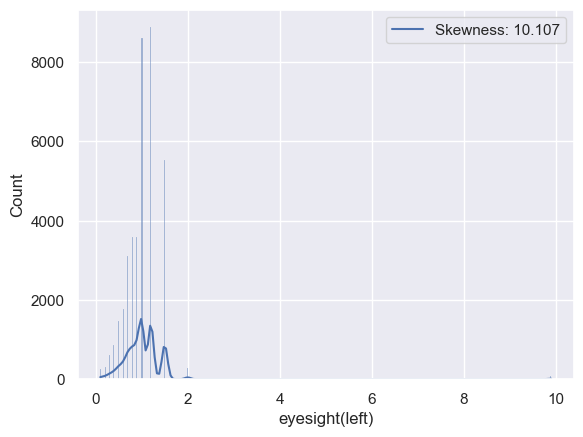

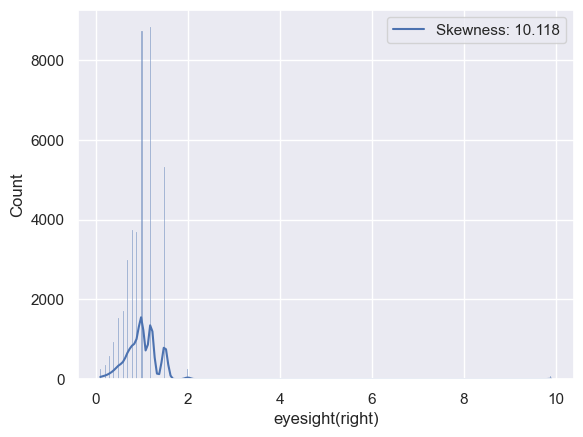

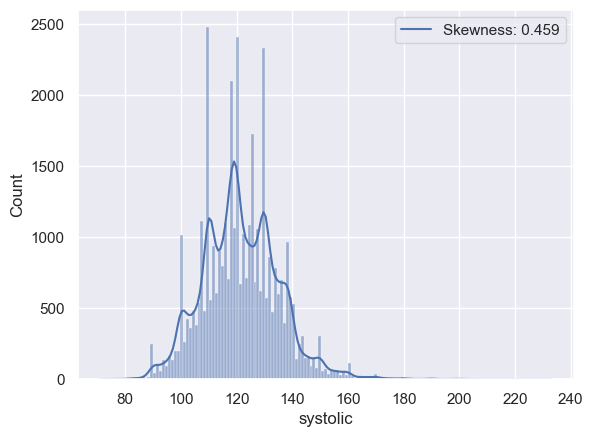

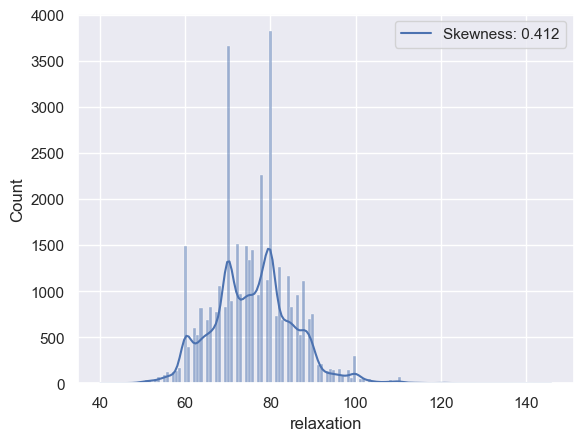

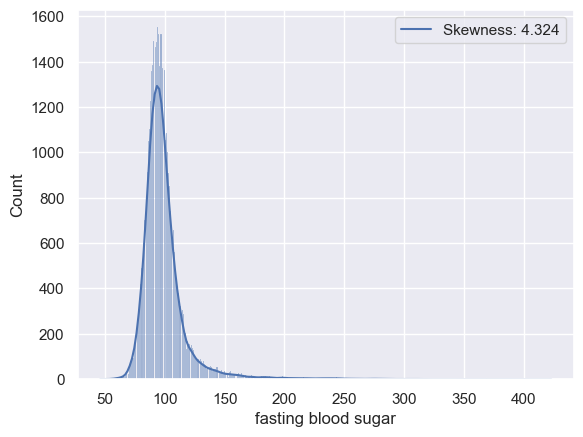

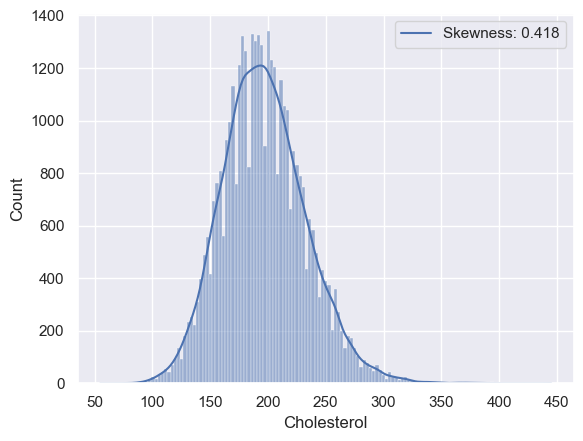

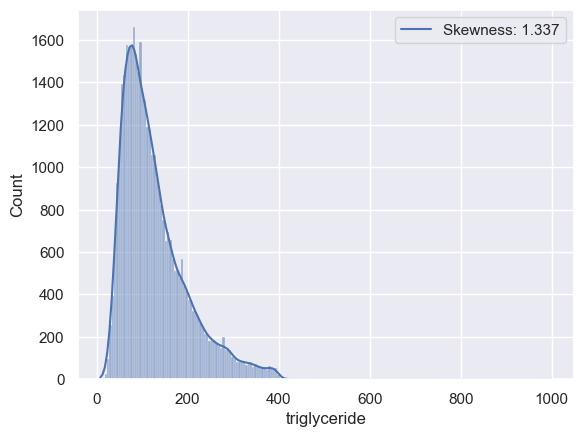

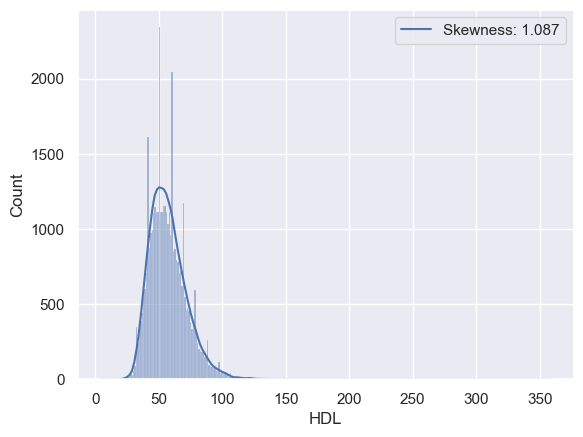

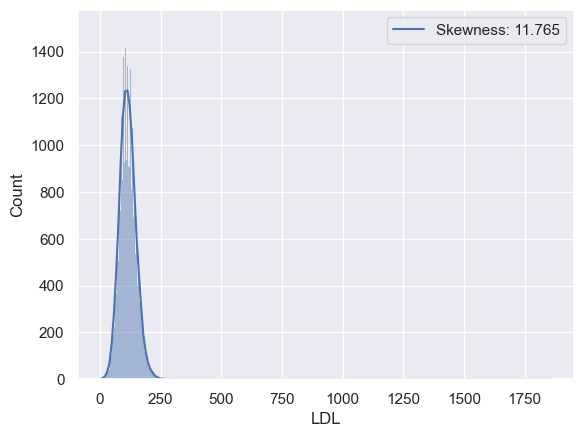

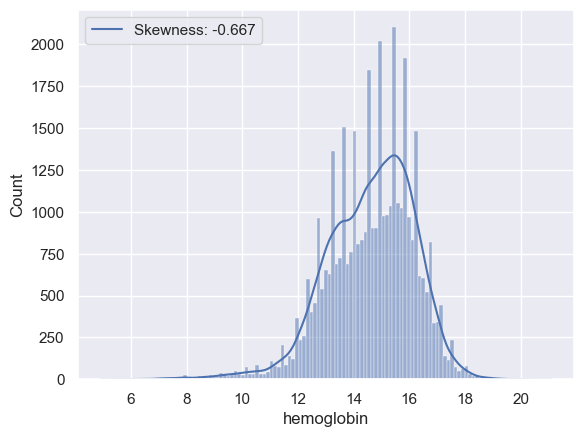

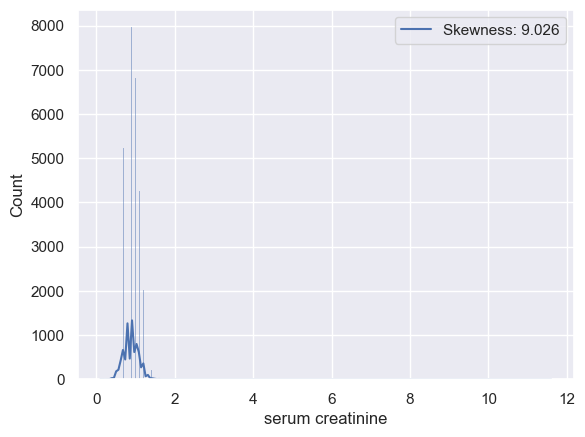

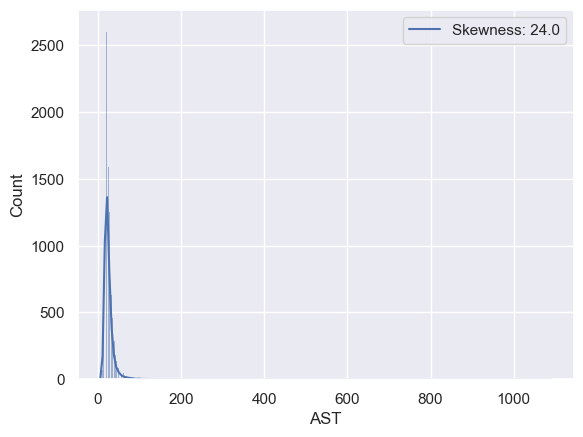

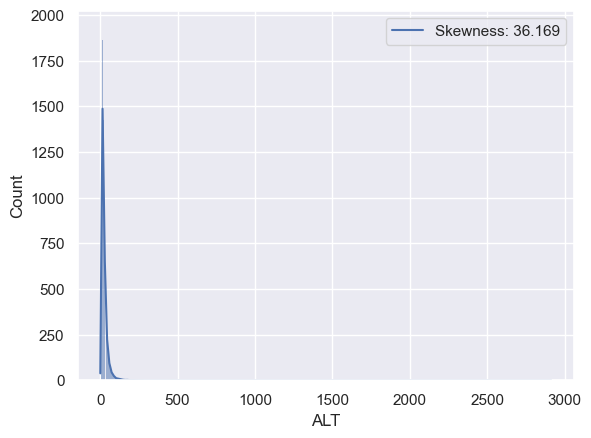

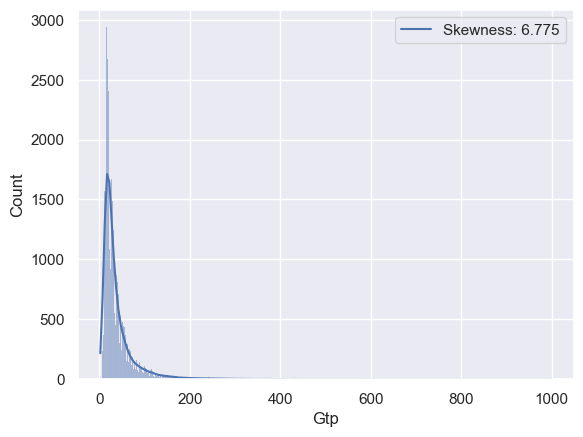

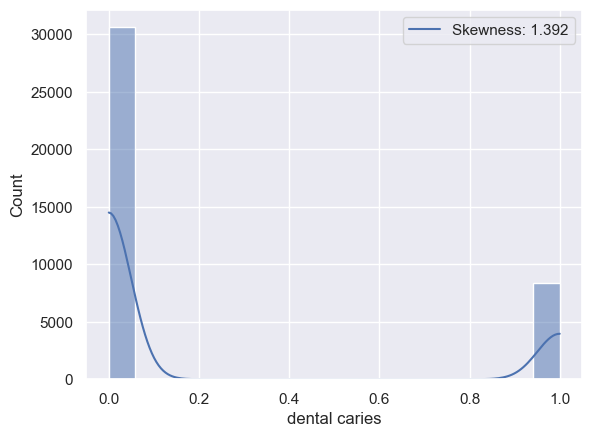

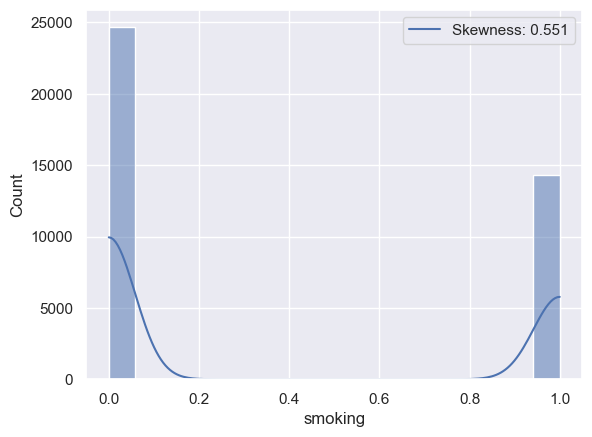

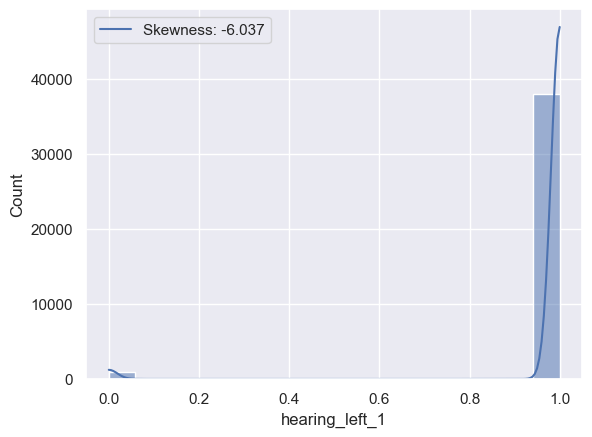

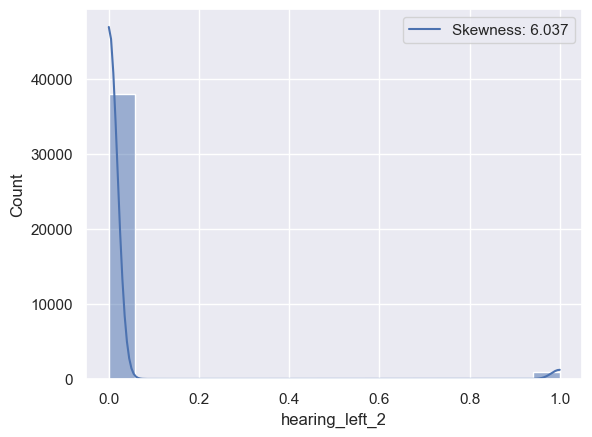

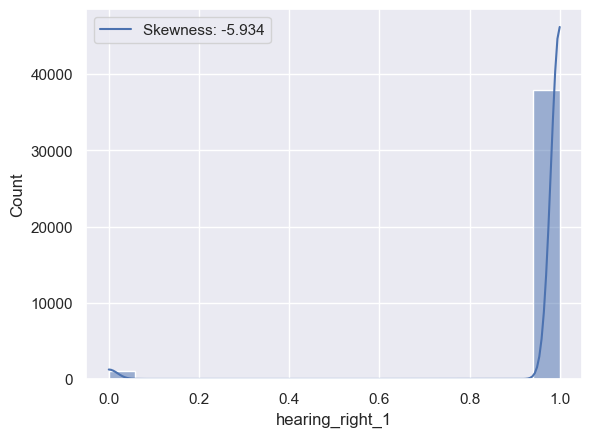

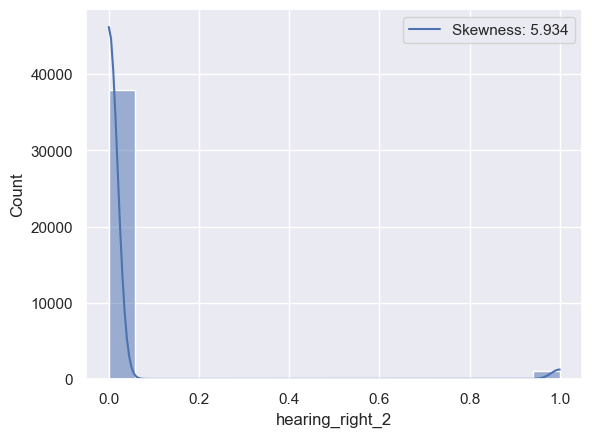

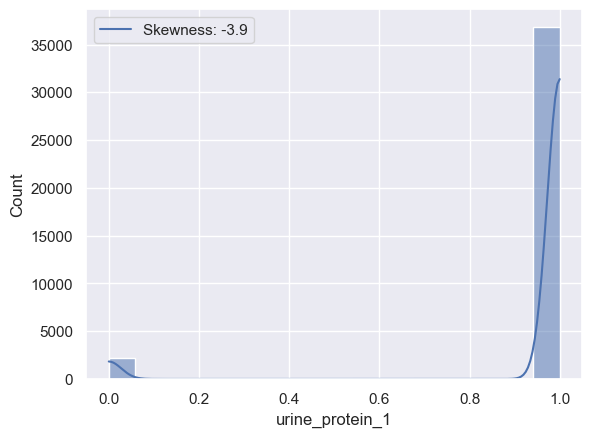

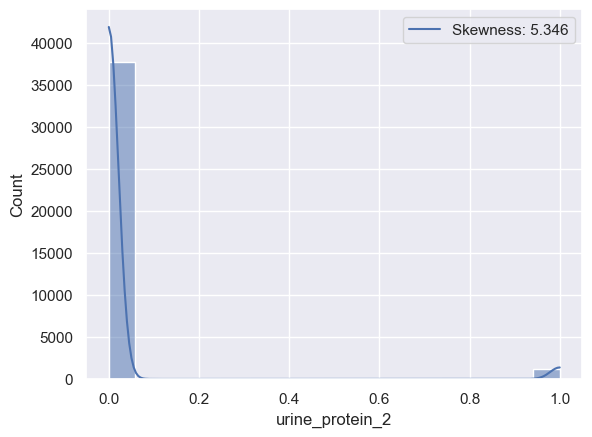

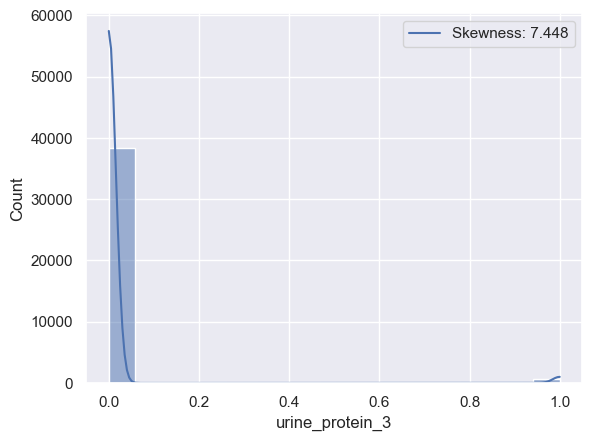

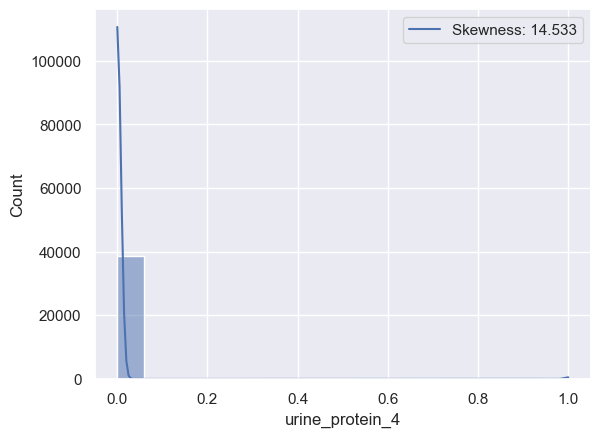

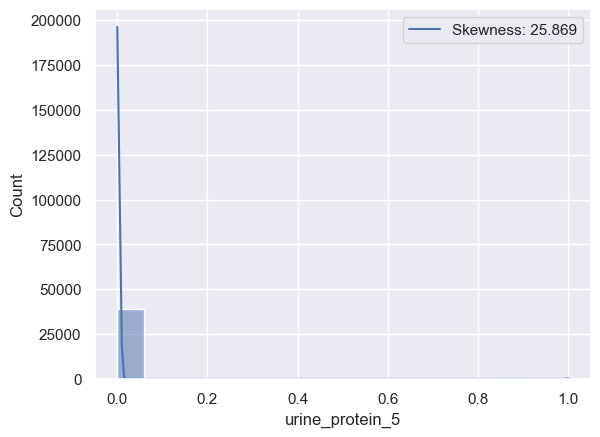

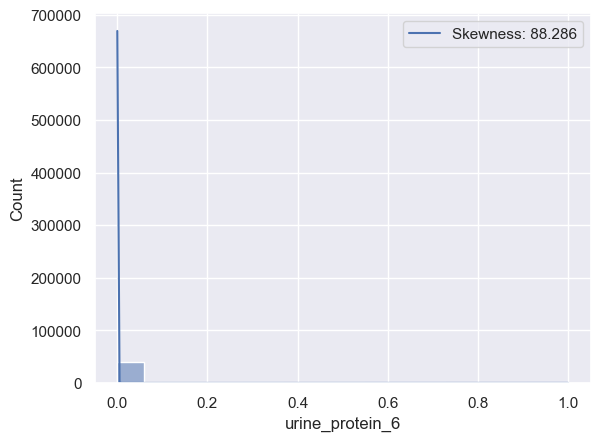

In [210]:
# Plotagem dos gráficos de distribuição com valor de skewness
columns = np.array(train_df.iloc[[], 1:30].columns).tolist()
for column in columns:
    plot_dist(df=train_df, feature=column)

<AxesSubplot:ylabel='smoking'>

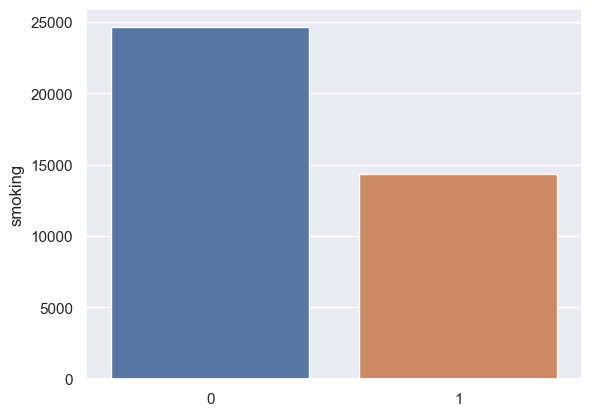

In [211]:
# Plotagem da target smoking
smoking_count = train_df["smoking"].value_counts()
sbn.barplot(x=smoking_count.index, y=smoking_count)

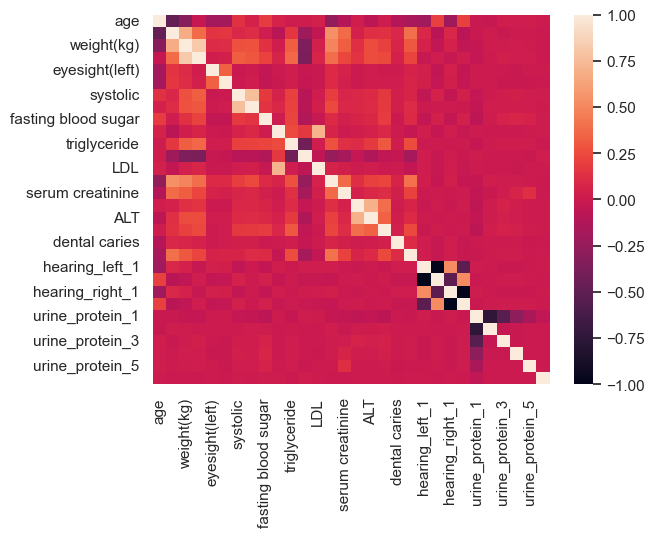

In [212]:
# Plotagem da correlação entre as features
plot_corr(train_df)

## Armazenamento de Datasets Preprocessados

In [213]:
# Armazenamento dos datasets em formato Parquet para otimização do uso de memória
train_df.to_parquet("../data/processed/train_dataset.parquet")
test_df.to_parquet("../data/processed/test_dataset.parquet")